# LET'S START ON THE FIRST PROBLEM – HOUSING PRICES AND SCIKIT-LEARN

We will put together an algorithm to predict housing prices in California.

##### Attribution

This exercise is mostly taken from Chapter Two of the book “Hands-On Machine Learning with SciKit-Learn and TensorFlow" by Aurelien Geron. An AWESOME chapter to a fabulous book!!! I hope he doesn't mind if I take my kids through this part of it...

Aurelien Geron's Chapter Two does a much more thorough walk-through. That one chapter was worth the price of the book!

##### Why are we doing this?

As in chapter two of the book, we will go through a lot of the steps that would be done for a true Machine Learning task: getting the data, data exploration, deciding what to do about data issues, making a data pipeline so it is easy to get newer data, splitting the data into training and validating data sets, selecting an algorithm, exploring the hyperparameter settings and trying to make the algorithm perform as well as possible on the training data set, and validating the model on the validating data set.

While doing this we will learn more about Python and several important libraries, especially pandas and scikit-learn. Most of our time is spent on data exploration and libraries/routines to help with that, but we also touch on regression and decision trees. We do a bit of a digression into a deep dive on regression and the tools for iteratively optimizing.

My purpose is to give the kids an introduction to (1) the many steps and pitfalls involved in getting, initially exploring, and preparing the data and (2) lead them from simple regression which they have some knowledge of to multivariate regression and introduce partial derivatives along the way.

One reason I want to explore regression is because we had previously looked at Google Causal Impact and with all the moving parts there we didn't completely cover regression. They need to get from approx. first year college calculus to the point where they can at least intuitively understand partial derivatives and backpropogation.

## Snarky Table of Contents

[Download the Data Set and use libraries OS, TARFILE, URLLIB](#Download-the-Data-Set-and-use-libraries-OS,-TARFILE,-URLLIB)

[PANDAS library - not just another spotted bear!](#PANDAS-library---not-just-another-spotted-bear!)
- [Pandas methods HEAD and TAIL](#Pandas-methods-HEAD-and-TAIL)
- [Pandas method INFO](#Pandas-method-INFO)
- [Pandas method VALUE_COUNTS](#Pandas-method-VALUE_COUNTS)

[MATPLOTLIB - is it an evil plot?](#MATPLOTLIB---is-it-an-evil-plot?)

[Data Sanitation - Keeping Training away from Validation](#Data-Sanitation---Keeping-Training-away-from-Validation)
- [Well, that almost worked... let's make a hash of it!](#Well,-that-almost-worked...-let's-make-a-hash-of-it!)

- [Reinventing the wheel](#Reinventing-the-wheel)

[That's enough ad-hoc fooling around - SciKit-Learn](#That's-enough-ad-hoc-fooling-around---SciKit-Learn)
- [When good data goes bad - get the lumps out](#When-good-data-goes-bad---get-the-lumps-out)
- [StratifiedShuffleSplit - smooth with no lumps!](#StratifiedShuffleSplit---smooth-with-no-lumps!)
- [Let's get organized up there!](#Let's-get-organized-up-there!)

[More evil plots - scatter plot!](#More-evil-plots---scatter-plot!)

[Why should we work? That is what computers are for!](#Why-should-we-work?-That-is-what-computers-are-for!)
- [Let's visualize that - is it correlated?](#Let's-visualize-that---is-it-correlated?)
- [I am ready for my close-up!](#I-am-ready-for-my-close-up!)
- [New data from old!](#New-data-from-old!)

[Surf the data pipeline - better than artisan hand-crafted data!](#Surf-the-data-pipeline---better-than-artisan-hand-crafted-data!)
- [Scaling - almost always necessary](#Scaling---almost-always-necessary)
- [Add the new data columns](#Add-the-new-data-columns)

[After all that - three lines of code???](#After-all-that---three-lines-of-code???)
- [This is an example of underfitting](#This-is-an-example-of-underfitting)
- [Overfitting - with more power comes more responsibility](#Overfitting---with-more-power-comes-more-responsibility)
- [As Aurelien Geron says in his book - WAIT, WHAT!? No error at all?](#As-Aurelien-Geron-says-in-his-book---WAIT,-WHAT!?-No-error-at-all?)
- [If at first you don't succeed - Random Forest](#If-at-first-you-don't-succeed---Random-Forest)

[Goodbye to the 100-acre wood](#Goodbye-to-the-100-acre-wood)

## Library Table of Contents

[OS, TARFILE, URLLIB](#Download-the-Data-Set-and-use-libraries-OS,-TARFILE,-URLLIB)

[PANDAS](#PANDAS-library---not-just-another-spotted-bear!)
- [HEAD and TAIL](#Pandas-methods-HEAD-and-TAIL)
- [INFO](#Pandas-method-INFO)
- [VALUE_COUNTS](#Pandas-method-VALUE_COUNTS)

[MATPLOTLIB](#MATPLOTLIB---is-it-an-evil-plot?)
- [HIST](#MATPLOTLIB---is-it-an-evil-plot?)
- [PLOT(KIND=SCATTER)](#More-evil-plots---scatter-plot!)
- [SCATTER_MATRIX](#Let's-visualize-that---is-it-correlated?)

[SCIKIT-LEARN](#That's-enough-ad-hoc-fooling-around---SciKit-Learn)
- [STRATIFIEDSHUFFLESPLIT](#StratifiedShuffleSplit---smooth-with-no-lumps!)
- [TRAIN_TEST_SPLIT](#Reinventing-the-wheel)
- [IMPUTER, LABELBINARIZER](#Scaling---almost-always-necessary)
- [PIPELINE, STANDARDSCALER, BASEESTIMATOR, TRANSFORMERMIXIN, FEATUREUNION](#Add-the-new-data-columns)
- [MEAN_SQUARED_ERROR](#Well-it-works---didn't-crash---but-the-values-are-not-very-accurate)
- [CROSS_VAL_SCORE](#As-Aurelien-Geron-says-in-his-book---WAIT,-WHAT!?-No-error-at-all?)
- [LINEARREGRESSION](#After-all-that---three-lines-of-code???)
- [DECISIONTREEREGRESSOR](#Overfitting---with-more-power-comes-more-responsibility)
- [RANDOMFORESTREGRESSOR](#If-at-first-you-don't-succeed---Random-Forest)

### Download the Data Set and use libraries OS, TARFILE, URLLIB

##### This will download the data file we will examine

By using a program instead of a browser, we can easily download and extract it again if the data gets updated.

This routine does the download and extraction and demonstrates several useful libraries:
* os - operating system
* tarfile - extraction from zip files and variants like gzip and tgz
* urllib - easily pull a file from a web address

In [1]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    return True, str(os.path.abspath(os.path.join(housing_path, "housing.csv")))

Now we have a routine we can call to fetch the data; let's call it.

This is the first time they have seen a Python function; showing a few things about returning values and a few printing tricks.

In [2]:
status, housing_file_name = fetch_housing_data()
# fname = fname.replace('\\', '/')
print("fetch_housing_data success = %s\nfile %s" % (status, housing_file_name))

fetch_housing_data success = True
file D:\Olson_Summer2017_PythonMachineLearning\Housing\datasets\housing\housing.csv


### PANDAS library - not just another spotted bear!

##### Another great library - pandas - and Object Oriented Programming

This allows reading of spreadsheets including Comma Separated Variable files (CSV files) - and lots more formats including Excel *.xlsx.

Once we read the *.csv file into the pandas "dataframe" object "housing" with the routine we wrote, we can look at the first few rows with the dataframe "head" method.

This technique is known as object-oriented programming: housing is an "instance" the object of type dataframe defined in the pandas library. This "dataframe" instance contains and/or points to both data and "methods" (functions) to operate on the data. We load (initialize) the pandas dataframe object instance "housing" with our csv data and then call the head method to see the first few rows.

Object-oriented programming can become a complex subject in itself (as you can see by the terminology above), but mostly we will just use objects from libraries and not get into the intricacies of making our own objects.

##### Pandas methods HEAD and TAIL


"head" and "tail" are inspired by commonly used Linux/Unix programs of that name that do about the same type of thing with any text file.

In [3]:
import pandas as pd
def load_housing_data(csv_path=None):
    if None == csv_path:
        csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
housing = load_housing_data(housing_file_name)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


##### Pandas method INFO

##### Another great pandas method is info()

It gives information about each of the columns as seen below.

As pointed out in Geron's great book, notice that the number of entries for total_bedrooms is not the same as the other columns. This means there are some rows with missing entries for total_bedrooms.

What should we do about this? Our machine learning algorithm only understands numbers; it cannot process a missing value.
* One possibility is to delete the rows with missing values. pros: no made-up data. cons: less data to train with
* Another possibility is to insert the average or the median value for that column. cons: value is not correlated with true value (made up). pros: more data to train with (info about the rest of the columns)

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


##### Pandas method VALUE_COUNTS

##### Yet another great pandas method - value_counts()!

As you can see, we select the ocean_proximity column of the housing object and call the value_counts() method. It returns the values found on the left and the count of how many rows had this value on the right.

Obviously, a text string like INLAND is not a number, so we must decide what to do with this column. For housing prices in California, it would be a pretty good guess that distance from the ocean is an important factor, so we don't want to throw it out. What are some options?

One option would be to assign each string to a number, like 1 = "<1H OCEAN" and 2 = "INLAND" and 3 = "NEAR OCEAN". You must be careful with this approach! It implies that 2 is twice as big as 1 and 3 is three times as big, which is clearly not the case for the label assignments shown above. Even if you order them the way that seems to make sense, you would be pre-judging what is important about the label.

An option often used is to change the one column with 5 choices (in this example) into 5 columns with either a 1 or 0 depending on whether that value applies to that column. For instance, if a row had the text ISLAND then the five columns would be 0,0,0,0,1 while a row that had the text "INLAND" would convert into 0,1,0,0,0. This technique, called "one-hot", makes no assumptions about relative importance of the labels and lets the machine learning algorithm decide the appropriate weight for each text choice.

In [5]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

##### even more pandas methods - describe()

This one gives interesting statistical info about each column.

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### MATPLOTLIB - is it an evil plot?

##### Now let's look at the data in more detail

Machine Learning algorithms work best when they are "trained" on data that includes enough samples of all important types. For instance, if we train with medical data that contains no samples of appendicitis, it would be hard for the algorithm to diagnose appendicitis.

A histogram shows how many samples were found in each of several data ranges or bins. For instance, if we had data on daily Los Angeles temperatures, we would expect to see more samples in the 70-80 deg F bin (range) than the 120-130 deg F bin.

The pandas dataframe method hist() will prepare histograms for each column that has numeric entries.

Note that there are strange peaks at the extreme high end for some columns like housing_median_age and median_house_value. This probably indicates that when entering the data, there was a maximum number to enter no matter how high the actual number was.

Note also that median_income has a range from approximately 0 to 15. This data is obviously not how many dollars are received per year; it must be scaled somehow. Also note the blip at the high end; this distribution had tailed off pretty heavily at that time so that probably represents another case of entering some maximum number if the actual number is above some value.

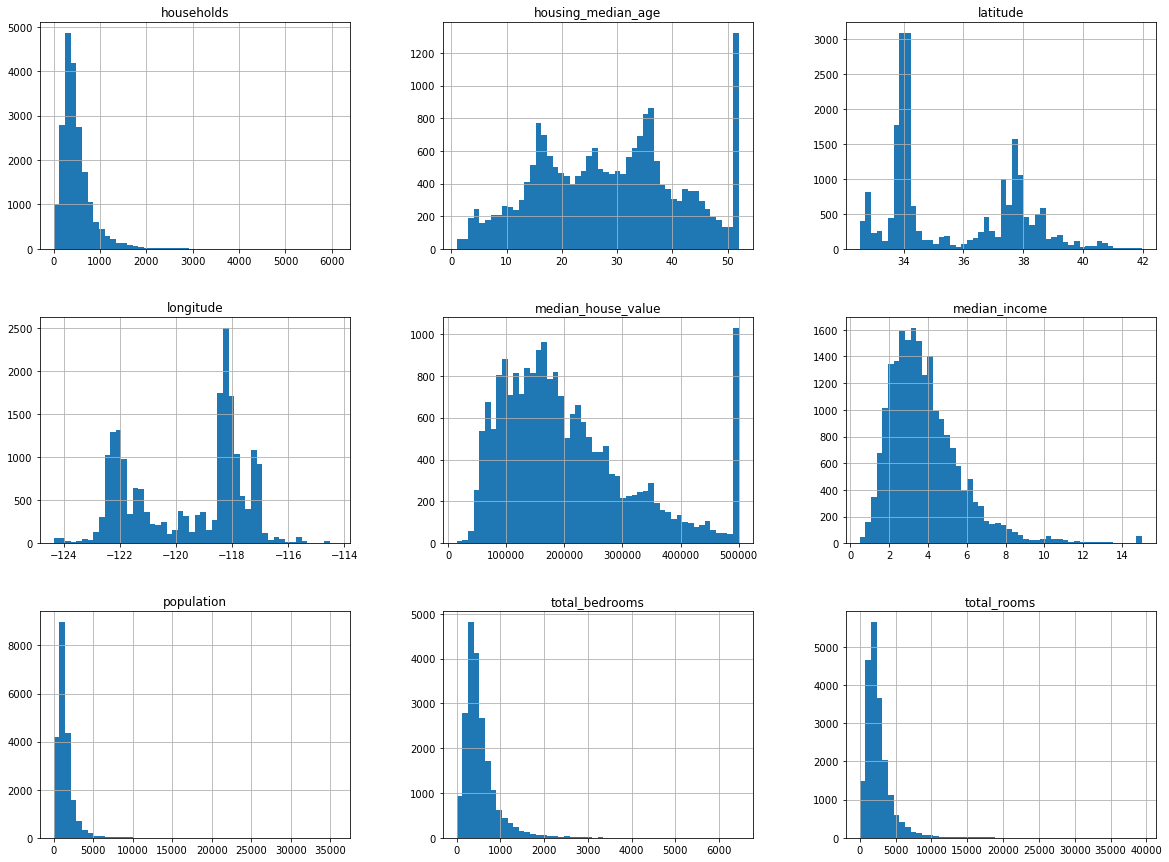

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

### Data Sanitation - Keeping Training away from Validation

##### Best Practices for training and validation data

If the algorithm is trained on all the data, it can adjust to the particular data in ways that do not generalize to all data.

For instance, if we trained on 10 coin-flip data samples which had 7 heads and 3 tails, then compared our model prediction performance on that same data, it would look good. However, when we went to Las Vegas and entered the famous coin-flipping tournaments we would be surprised to see that it performed less well on real-world data.

That flip (ha ha!) example only shows the tip of the iceberg. A more serious issue is that the model might "overfit" the training data by finding things in the training data that correlate well in the training data but are actually just coincidence. For instance if a model is trained to identify goats and sees many pictures of goats on grass plus other pictures of things like cars on roads or people in houses, the model may notice that if the bottom of the picture is green then it is likely to be a goat. That is true in the training data set but it is not a characteristic of goats. If the model uses that type of information, that is called overfitting and the model will give surprising results when used on real-world data, like goats on the "Let's Make a Deal" show with Monty Hall.

Another issue to consider is whether the model has enough samples to represent all the important cases. We already discussed the problem of a medical training data set that did not include samples of appendicitis.

To go a step deeper: what if we have 10 million samples in our medical training data but only 3 of them have a bacterial infection of bone (this is actually quite similar to the experience of a practicing M.D.; they see the common cases over and over and but still need to recognize the one-in-a-million cases). If we naively train a model with this data, only a tiny bit of the influence of the training data would cause it to be able to recognize a bacterial infection of bone, and it might be misdiagnosed as late stage virulent cancer requiring immediate - like 15 minutes from now - surgery to remove the arm. 

BTW - this scenario actually happened to a friend of mine who fortunately ignored the first doctor, flew to the Mayo clinic, got a new diagnosis, and only had a portion of the bone removed followed by strong antibacterial therapy and thus kept his arm.

We will speak more about data sets that contain only a small percentage of examples of important cases.

##### OK - let's back up from that rabbit hole...


There are many steps in the process that will attempt to deal with these issues. The first step is to divide the data into two pieces: the "training" data and the "validation" or "test" data.

The idea is the model is trained on the "training" part of the data, then tested on the "validation" part of the data to get a sense for whether the model has found features that generalize to data that it has not seen before (example: not just looking for grass in the picture).

##### One thing that is critical - once you split the data, keep it split the same way and never train on the validation data!

You will find that the trained model always gets a better score on the training data (that it has seen before) than it does on other data - either the validation data or real world data.

If you allow your model to train on the validation data and then test it on the validation data, you will but unhappily surprised when it runs into real world data.

One way that this can happen is that the split is usually done by a program using random numbers. If you do that split one day and train, then come back the next day and split it again and train some more, unless you are careful the split could be different the 2nd time and some validation and training data will leak into each other. To avoid this you could "seed" the random number generator and always seed it the same way.

That prohibition applies all the way through training and evaluating your models. Once you have validated your model, it makes sense to train it also on the validation data before it hits the real world.

In [8]:
import numpy as np

# this is an example of how to split the data into training and validating data sets
# this demonstrates the problem described above - it does NOT provide a seed for the
#     random number generator.
# each time it runs it will split the data a different way
# but even if we seed the random number generator, it will split differently when
#     we load a new updated data set with additional entries

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), " train + ", len(test_set), " test")

16512  train +  4128  test


In [10]:
##### Well, that almost worked... let's make a hash of it!

Oops - we previously made a function that can update the data. Even seeding the random number generator will not split it properly if someone adds data to the data set.

Well, we can solve that! Use a cryptographic "hash" function on the row index and use that to split the data. Still random, and if someone adds samples at the end it still splits the earlier samples the same.

Even this will not work if a row is deleted or if data is added at the start or if the data gets re-ordered or...

In [11]:
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier),).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[-in_test_set], data.loc[in_test_set]

##### Reinventing the wheel

##### That's another fine rabbit hole you got us in, Ollie!

Here we are re-inventing the wheel! time to introduce the SciKit-Learn library!

This library has many capabilities, is widely used, and is actively updated. People have been thinking hard about these problems for a long time, and their solutions have been used world-wide so probably are better tested than anything you or I will code up this month.

We will use the train_test_split() routine to split our housing pandas dataframe data into two pieces: 80% train and 20% test. We will seed our random number generator with 47, my favorite number. A more commonly seen number is 42 from the "Hitch-Hiker's Guide to the Galaxy".

In [12]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=47)

In [13]:
print(len(train_set), " ", len(test_set))

16512   4128


### That's enough ad-hoc fooling around - SciKit-Learn

##### Now let's REALLY think about the data

We would expect that the housing prices in an area, which we are trying to predict, would be highly correlated with the median income in that area, and thus median income would be important data for our model.

We already saw that median income is scaled to approximately 0-15. Let's see again how it is distributed within our training data set.

(array([  293.,  1484.,  2827.,  3105.,  2804.,  2104.,  1492.,   928.,
          531.,   305.,   230.,   110.,    53.,    88.,    55.,    14.,
           19.,    19.,     5.,    46.]),
 array([  0.4999 ,   1.22491,   1.94992,   2.67493,   3.39994,   4.12495,
          4.84996,   5.57497,   6.29998,   7.02499,   7.75   ,   8.47501,
          9.20002,   9.92503,  10.65004,  11.37505,  12.10006,  12.82507,
         13.55008,  14.27509,  15.0001 ]),
 <a list of 20 Patch objects>)

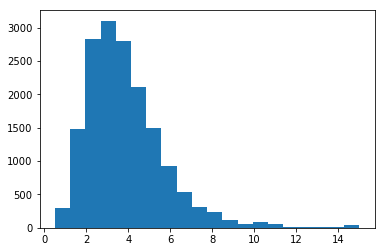

In [14]:
plt.hist(train_set["median_income"],20)

In [15]:
##### When good data goes bad - get the lumps out

##### Remember the medical data set with no examples of diabetes...

Those tiny little bumps on the right mean there are only a few examples of those parameters. Ideally for prediction purposes, the levels would be approximately equal all across the plot.

That would be what is known as sampling bias. If the dataset is large enough then we can correct for sampling bias.

* We could throw away numerous samples in the big bump areas, but in our case we would hardly have any samples left
* We could duplicate examples from the smaller bins, but that would likely cause the model to pick up on peculiar properties of our small number of samples (think goats and green grass)

We use a different technique: we "stratify" the data to ensure the training and validating data sets are equally distributed. This does not solve the problem of having few sample points for important cases.

We create a new "column" of data in the housing data called income_cat. We will divide the income categories into 5 slices, moving most of the right side of the graph into the top category.

We will want to do this step before splitting the data. This type of data "cleanup" will cause us to have a series of cleanup steps (called a pipeline). It will make sense for us to have a program to get new datasets, clean them up, and then split them so we don't have to manually do that each time.

(array([  822.,  6581.,  7236.,  3639.,  2362.]),
 array([ 1. ,  1.8,  2.6,  3.4,  4.2,  5. ]),
 <a list of 5 Patch objects>)

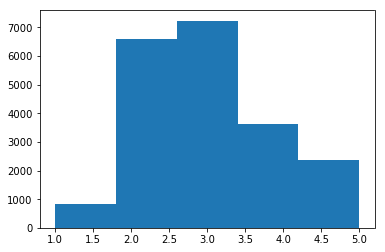

In [16]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
plt.hist(housing["income_cat"],5)

##### StratifiedShuffleSplit - smooth with no lumps!

##### Now we have a somewhat flat income distribution - make the split keep it!

When we split the housing data we want the split to be about equal (percentage wise) with respect to income_cat to avoid sampling bias on a term that is important in our model.

Note that we have just decided ahead of time that we think median income is important for predicting house prices.

It is possible with some model algorithms to just give it all your raw data and have it figure out what is important and how to scale it etc., but a mistake we make before or during the time we split the data into train/validate can make the algorithm blind to that property. For instance, if a random split puts all of the very few high-income samples into the validation data, it will be like the medical data set with no examples of appendicitis.

Also the "let the machine have the data and figure it out" approach can make it take MUCH longer to train the algorithm.

In this case we feel confident that the median income in an area will be strongly correlated with the housing prices in that area so we make sure the training and validating data sets have representative samples.

Of course, the people who write SciKit-Learn knew about this need and wrote a well-tested routine to make that split with representative quantities in each resulting data set, so we would be insane not to use it. It is called StratifiedShuffleSplit() and we can use its resultant object (here called "split") to pay special attention to this parameter of interest.

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=47)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [18]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

##### Let's get organized up there!

##### Now let's delete the old income_cat column

Now that we have the split by our made-up "income_cat" column, we can let the model train on the higher-resolution median_income column and delete our column.

You can see how processing the data turns into a long set of steps or a pipeline of steps. We will eventually gather this up into a unified routine.

In [19]:
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace = True)

##### instead of calling it strat_train_set...

Let's put that training set back into our housing dataframe...

note to my kids: That "copy()" method reminds me that when you are more familiar with Python I should discuss with you some facets of its behavior that are different than some other languages...

In [20]:
housing=strat_train_set.copy()

### More evil plots - scatter plot!

##### Lets look at the data using a latitude/longitude plot

Using a scatter plot, we display each of the housing data (remember, this is now our training data set). It is really cool that you can recognize the shape of California. Of course this is not a true map projection, but it is recognizable. BTW there are many capabilities to do true map projections using just a few python lines, but that is another rabbit hole...

The points in this plot have an "alpha" value of 0.4, where 0.0 would be invisible and 1.0 would be totally opaque. We do this so that you can get a sense of where there are more than one sample point at or near the same latitude/longitude.

The diameter of the circles are based on the population density of the location. The color of the circles are based on the median house value of the location, from red to violet. This is much as in the rainbow, but with the bluer colors being lower housing values and the reder colors being higher housing values. This is done using a standard colorbar.

You can clearly see the high housing prices in the San Francisco bay area and in the Santa Barbara/Los Angeles/San Diego area. You can also clearly make out the high density population in the central valley where so much of our food is grown.

From this we might guess that housing price would be correlated with nearness to ocean but also nearness to large population centers.

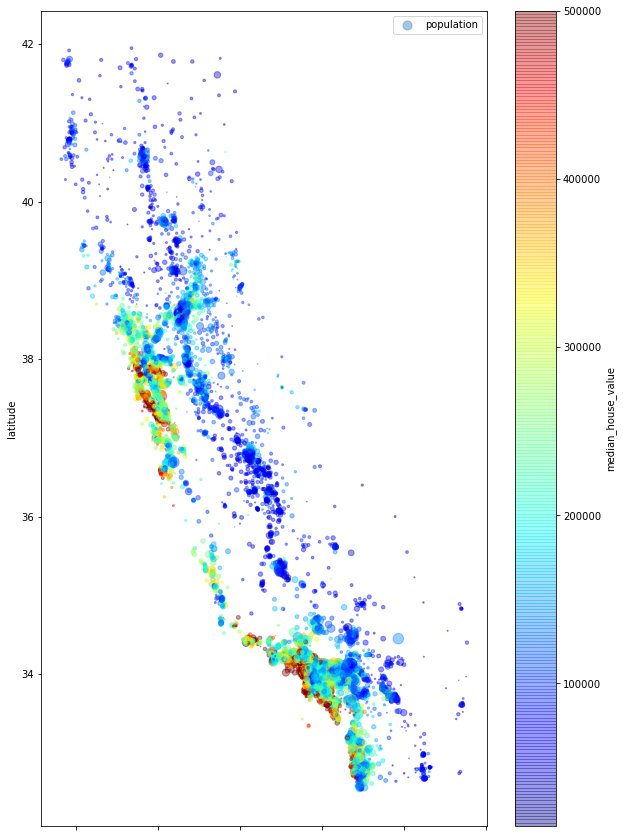

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, label="population", c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, figsize=(10,15))

### Why should we work? That is what computers are for!

##### Let's let the computer tell us what the correlations are

We have been using some intuition and background knowledge to try to determine which factors would be important; let's let the computer do a linear correlation study and see what the data suggests.

We list linear correlation with respect to median house value, which we feel is highly correlated with what a particular house value would be.

The larger the magnitude or absolute value of the linear correlation, the more highly linear correlated the column.

Note that a linear correlation magnitude of 1.0 means the column can be used in a linear equation (aX + b) to perfectly predict the median_house_value column. Obviously median_house_value is perfectly correlated with median_house_value.

As we suspected, median_house_value is also highly correlated with median_income.

The next highest correlation is latitude; that is negatively correlated (magnitude of -0.14 is greater than magnitude of 0.13) but that just means that the "a" in aX + b has a negative sign.

Everything else trails off after that.

In [22]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.685020
total_rooms           0.134084
housing_median_age    0.098698
households            0.065762
total_bedrooms        0.049418
population           -0.025208
longitude            -0.040254
latitude             -0.150659
Name: median_house_value, dtype: float64

##### Let's visualize that - is it correlated?

The now-deprecated scatter_matrix routine shows the column-to-column scatter plots of our correlation matrix.

As we know, median_house_value versus median_house_value (or any other column versus itself) would give just a straight line. Since that plot would have no information, the plots in the falling diagonal are replaced by histograms.

C:\Users\mdo\Anaconda3\envs\keras_tf_gpu\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002430B64C978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002430B09B828>]], dtype=object)

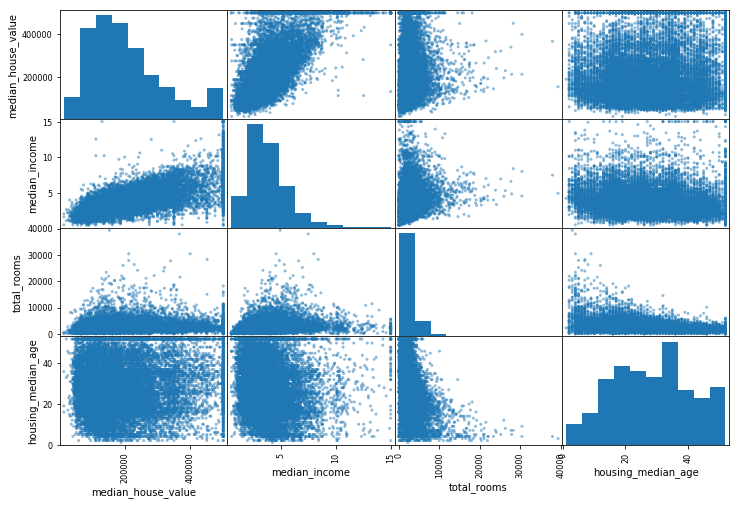

In [23]:
from pandas.tools.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

##### I am ready for my close-up!

##### Let's look at median_income vs median_house_value in close-up

We will do that with a couple of different alpha (transparency) values and in both orientations.

Note the line that appears at housing value $500,000. Also there are less prominent lines at about $450K, $350K, $275K, and maybe a couple of other values.

The $500K line is because the data is topped out there: if a house has a value of $600K it was just enterred at $500K since that was the highest value they wanted in their database. Don't ask me why.

I speculate that the other lines are due to better loan deals offered if the loan "conforms" to certain guidelines. For instance, there used to be a "conforming" jumbo loan maximum of about $450K, so if the price would otherwise be $455K then there would be incentive for the buyer to get it to $450K. They might (for instance) make the agreement be that they would pay $5K for appliances and furniture, and take that amount outside of the loan.

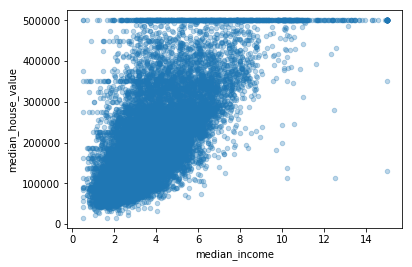

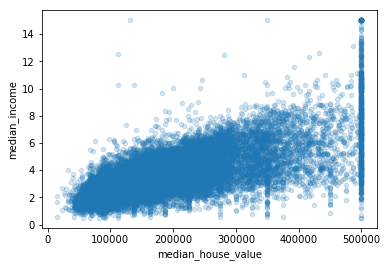

In [24]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.3)
housing.plot(kind="scatter", x="median_house_value", y="median_income", alpha=0.2)

### New data from old!

##### Linear Correlation isn't everything! We need more power!

Intuitively we feel that the number of bedrooms per house should correlate with the price.

There are columns dealing with the bedrooms in the region and the total number of rooms in the region and the total number of households in the region. But those do not have a high linear correlation with median_house_value.

We can create some artificial columns that are non-linear combinations of other columns and see if we can get a few more columns with higher correlation.

We see that bedrooms_per_room and rooms_per_household correlate well. The population_per_household is not so promising.

In [25]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.685020
rooms_per_household         0.147356
total_rooms                 0.134084
housing_median_age          0.098698
households                  0.065762
total_bedrooms              0.049418
population_per_household   -0.022267
population                 -0.025208
longitude                  -0.040254
latitude                   -0.150659
bedrooms_per_room          -0.253801
Name: median_house_value, dtype: float64

### Surf the data pipeline - better than artisan hand-crafted data!

##### OK that was experimenting; now let's do it for real.

We keep talking about a data pipeline; now let's make one.

I am going to rush forward through this part. Aurelien Geron's Chapter Two does much more discussion of the right way to do this, using SciKit-Learn routines when they are available and making your special code for your data issues fit into the SciKit-Learn mold to make it all easy to maintain.

For our purposes, we just want to get the data cleaned up so we can move to the next part.

* We separate the training data from the column median_house_value column, which we will call the "labels". What we are trying to do is predict median_house_value from the rest of the columns.
* We "impute" missing housing_num values with the median value
* Use LabelBinarizer() to do one-hot transform on text field ocean_proximity

##### Scaling - almost always necessary

##### Thoughts on scaling...

Scaling the input data is expected by most Machine Learning algorithms. If one parameter - say median_income - is scaled at 0 to 15 while latitude is all around -115, it can take the learning algorithm a long time to multiply by something that makes the median_income term bigger than the latitude term. If they are both scaled from 0 to 1 then the relative importance of the terms can be found quicker.

A couple of common scaling methods:
* Min-Max scaling (or Normalization) to [0, 1]
* Standardization - centered around zero and divided by statistical variance to give unit variance

Min-Max is sensitive to outliers. For instance, suppose our income data (range [0, 15]) had an erroneous value of 100. Then all the correct values would be forced into the range [0.00, 0.15] while the erroneous value would be 1.00.

We will use StandardScaler() from SciKit-Learn. This does - surprise! - standadization scaling.

Be sure to scale on the training data and use those scaling params on the validation data - the method is supposed to generalize, and the validation data is supposed to tell us whether or not it does!

In [26]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()

from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1) # Imputer cannot work on text
imputer.fit(housing_num)
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index = list(housing.index.values))
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.head()

from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
housing_cat = housing["ocean_proximity"]
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ..., 
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0]])

##### Add the new data columns

##### Now make a routine that fits into SciKit-Learn to add the extra columns for correlation

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-122.01,37.98,29,2001,373,956,370,4.317,NEAR BAY,5.40811,2.58378
1,-118.4,37.36,34,2465,619,1172,575,1.9722,INLAND,4.28696,2.03826
2,-119.29,36.12,24,1248,226,641,200,2.4722,INLAND,6.24,3.205
3,-118.18,33.74,30,5915,1750,2136,1503,4.0968,NEAR OCEAN,3.93546,1.42116
4,-122.49,37.76,52,1792,305,782,287,4.0391,NEAR BAY,6.2439,2.72474


In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('label_binarizer', LabelBinarizer()),
    ])

from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape

(16512, 16)

### After all that - three lines of code???

##### WHEW! now we are finally ready for the machine to learn something

We sure have to spoon-feed it data. Lots of mistakes can happen in the data preparation if care is not taken.

Take a look at the "Regression" part of our summer project to see what regression is and how the parameters are calculated.

In [29]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

# that's all it takes folks!!!

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
# let's try the full pipeline on a few training instances and compare against the actual values
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 235464.7556846    58419.21997472   91566.85786999  370463.01201292
  263151.31677006]
Labels: [194000.0, 116100.0, 129200.0, 310000.0, 332700.0]


##### Well it works - didn't crash - but the values are not very accurate

Let's get a Mean Square Error estimate over the whole training set

In [31]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68153.481235817453

##### This is an example of underfitting

For most districts, median housing values go from about \$120K to \$265K so if our model typically predicts something that is off by \$68K that is not very helpful.

When a model underfits the data, it usually means that the features in the data don't have enough predictive value to enable a better fit. It can also mean that the model we chose is not powerful enough to use that data succesfully.

##### Overfitting - with more power comes more responsibility

Let's try a more powerful model - the SciKit-Learn implementation of DecisionTreeRegressor().

In [32]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=47)
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

##### As Aurelien Geron says in his book - WAIT, WHAT!? No error at all?

Probably the Decision Tree overfit the data because the Decision Tree model was too powerful (in this case, split the data into too deep of a many-nested tree).

How do we tell if it did overfit? We are not yet ready to introduce the models to the validation data.

We can have the model trained and evaluated over various K-fold splits of the training data to do cross validation. This is a powerful technique!

When we do this, we see that the DecisionTreeRegressor model works slightly less well than the LinearRegression model. This confirms that the DecisionTreeRegressor is triggering on data items that don't generalize well - the classic characteristic of overfitting.

As Aurelien Geron says: The Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model.

In [33]:
from sklearn.model_selection import cross_val_score

def display_scores(scores, text):
    print("%s Scores:" % text, scores)
    print("%s Mean:" % text, scores.mean())
    print("%s Standard deviation:" % text, scores.std())

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores, "DecisionTreeRegressor")

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores, "LinearRegression")

DecisionTreeRegressor Scores: [ 64116.62645943  71216.03991947  70813.075952    69604.34130375
  70237.34190401  69907.61018493  74686.51958958  67894.57046154
  70026.4647017   69130.95569754]
DecisionTreeRegressor Mean: 69763.3546174
DecisionTreeRegressor Standard deviation: 2521.26099566
LinearRegression Scores: [ 65700.48321892  68762.92305362  69337.29782428  69358.56833171
  67239.42084393  69419.71541978  70844.1689622   68361.57614763
  67030.87537834  68330.63853462]
LinearRegression Mean: 68438.5667715
LinearRegression Standard deviation: 1394.38608567


##### If at first you don't succeed - Random Forest

##### One more model type - Random Forest Regressor

This model trains on random subsets of features then "averages" the predictions. The technique of building a model out of many other models is called Ensemble Learning, and it can be very useful.

We see that its prediction in the training set gives a raw RMSE of about \$22K, somewhere between the \$63K of the linear regression model and the disturbing \$0K of the Decision Tree. This is certainly the most comfortable of the three models we have tried from a raw RMSE of the training data perspective.

However, performing the same K-fold cross validation scoring as with the other models we see that it does not seem to be significantly more generalizable than the other models.

In [34]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=47)
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print("RandomForestRegressor raw RMSE", forest_rmse)

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(lin_rmse_scores, "RandomForestRegressor")

RandomForestRegressor raw RMSE 21984.0476248
RandomForestRegressor Scores: [ 65700.48321892  68762.92305362  69337.29782428  69358.56833171
  67239.42084393  69419.71541978  70844.1689622   68361.57614763
  67030.87537834  68330.63853462]
RandomForestRegressor Mean: 68438.5667715
RandomForestRegressor Standard deviation: 1394.38608567


### Goodbye to the 100-acre wood

##### This is where we part company with Aurelien Geron's Chapter two of  “Hands-On Machine Learning with SciKit-Learn and TensorFlow"

Bidding a fond adieu (or a fondue - ha!) to this great book! Chapter two continues on with hyperparameter tuning of the models and even more in the exercises...

And now for something completely different - neural networks and the stock market!